# Data Loading

In [1]:
#all the necessary imports
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from xgboost import XGBClassifier


Fetching data from the database and converting them into data frames

In [2]:
#Fetching data from Local database to use it as a dataframe for ML part 

import pandas as pd
import mysql.connector


# SQL query
query_1 = 'SELECT * FROM collections'
query_2 = 'SELECT * FROM products'
query_3 = 'SELECT * FROM products_nonsale'

try:
    #connect to server
    conn = mysql.connector.connect(host='localhost',
                                   user='root',
                                   password='Rach@76732',
                                   )
    cursor = conn.cursor()
    conn.database = 'nike'
    
    collections_df = pd.read_sql(query_1, conn)
    

    products_df = pd.read_sql(query_2, conn)
    

    products_ns_df = pd.read_sql(query_3, conn)
    #print(products_ns_df)
except mysql.connector.Error as err:
    print("Error: ", format(err))
finally:
    
    conn.close()
    print("MySQL connection is closed.")


MySQL connection is closed.


/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2588089719.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  collections_df = pd.read_sql(query_1, conn)
/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2588089719.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_df = pd.read_sql(query_2, conn)
/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2588089719.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_ns_df = pd.read_sql(query_3, conn)


In [3]:
collections_df

,name
0,Air Force 1
1,Air Max
2,Alpha Huarache
3,Blazer
4,Bruin
5,Cortez
6,Foamposite
7,Jordan Editions
8,Metcon
9,Monarch


In [4]:
len(collections_df)

17

In [5]:
#adding column id for indexing purpose
collections_df['id'] = collections_df.index + 1  # To start IDs from 1


In [6]:
collections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    17 non-null     object
 1   id      17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


In [7]:
collections_df

,name,id
0,Air Force 1,1
1,Air Max,2
2,Alpha Huarache,3
3,Blazer,4
4,Bruin,5
5,Cortez,6
6,Foamposite,7
7,Jordan Editions,8
8,Metcon,9
9,Monarch,10


In [8]:
products_df.head()

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection
0,454350-003,Nike Manoa Leather,Men's Boots,$81.97,$95,13%,The Nike Manoa is the perfect match when dress...,473,4.7,others
1,456975-001,Nike Manoa,Men's Boot,$81.97,$95,13%,"Durable leather, breathable mesh and rugged lu...",29,4.3,others
2,553558-072,Air Jordan 1 Low,Men's Shoes,$80.97,$115,29%,"Inspired by the original that debuted in 1985,...",1742,4.9,others
3,864349-010,Nike SB Zoom Blazer Mid,Skate Shoes,$56.97,$90,36%,The Nike SB Zoom Blazer Mid takes a heritage d...,65,4.6,Blazer
4,AO2416-101,Nike Fury,Wrestling Shoes,$76.97,$90,14%,The Nike Fury combines exceptional flexibility...,2,4.5,others


In [9]:
len(products_df)

191

In [10]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         191 non-null    object
 1   title              191 non-null    object
 2   category           191 non-null    object
 3   sale_price         191 non-null    object
 4   original_price     191 non-null    object
 5   discount_offer     191 non-null    object
 6   description        191 non-null    object
 7   number_of_reviews  191 non-null    int64 
 8   rating             191 non-null    object
 9   collection         191 non-null    object
dtypes: int64(1), object(9)
memory usage: 15.1+ KB


Adding sale column based on discunt offer column for further analysis

In [11]:
products_df['sale'] = 'Y'

In [12]:
products_df.head()

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,sale
0,454350-003,Nike Manoa Leather,Men's Boots,$81.97,$95,13%,The Nike Manoa is the perfect match when dress...,473,4.7,others,Y
1,456975-001,Nike Manoa,Men's Boot,$81.97,$95,13%,"Durable leather, breathable mesh and rugged lu...",29,4.3,others,Y
2,553558-072,Air Jordan 1 Low,Men's Shoes,$80.97,$115,29%,"Inspired by the original that debuted in 1985,...",1742,4.9,others,Y
3,864349-010,Nike SB Zoom Blazer Mid,Skate Shoes,$56.97,$90,36%,The Nike SB Zoom Blazer Mid takes a heritage d...,65,4.6,Blazer,Y
4,AO2416-101,Nike Fury,Wrestling Shoes,$76.97,$90,14%,The Nike Fury combines exceptional flexibility...,2,4.5,others,Y


In [13]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,NULL,$250,NULL,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6
1,FB2390-900,KD16 By You,Custom Basketball Shoes,NULL,$190,NULL,Kevin Durant's bag? Bottomless. His range? Lim...,0,NULL,others,3
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,NULL,$90,NULL,When the sun’s beating down your back and your...,18,4.7,others,3
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,NULL,$75,NULL,Instantly tilt the field in the bold design of...,67,4.4,others,3
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,NULL,$260,NULL,Obsessed with perfecting your craft? We made t...,17,4.6,others,4
...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,$80.97,$115,29%,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,NULL,$175,NULL,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,NULL,$125,NULL,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,NULL,$70,NULL,Whether you’re starting out or just playing fo...,1,1,others,1


In [14]:
len(products_ns_df)

381

# DATA PRE - PROCESSING

In [15]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,NULL,$250,NULL,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6
1,FB2390-900,KD16 By You,Custom Basketball Shoes,NULL,$190,NULL,Kevin Durant's bag? Bottomless. His range? Lim...,0,NULL,others,3
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,NULL,$90,NULL,When the sun’s beating down your back and your...,18,4.7,others,3
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,NULL,$75,NULL,Instantly tilt the field in the bold design of...,67,4.4,others,3
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,NULL,$260,NULL,Obsessed with perfecting your craft? We made t...,17,4.6,others,4
...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,$80.97,$115,29%,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,NULL,$175,NULL,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,NULL,$125,NULL,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,NULL,$70,NULL,Whether you’re starting out or just playing fo...,1,1,others,1


Handling Missing values for sale price column

In [16]:
import pandas as pd


#  replace 'NULL' with na
products_ns_df.replace('NULL', pd.NA, inplace=True)

# Where sale_price is NA, replace it with original_price and set discount_offer to 0
products_ns_df['sale_price'] = products_ns_df['sale_price'].fillna(products_ns_df['original_price'])
products_ns_df['discount_offer'] = products_ns_df['discount_offer'].fillna('0%')

products_ns_df['rating'] = products_ns_df['rating'].fillna(0)

products_ns_df


,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,$250,$250,0%,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6
1,FB2390-900,KD16 By You,Custom Basketball Shoes,$190,$190,0%,Kevin Durant's bag? Bottomless. His range? Lim...,0,0,others,3
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,$90,$90,0%,When the sun’s beating down your back and your...,18,4.7,others,3
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,$75,$75,0%,Instantly tilt the field in the bold design of...,67,4.4,others,3
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,$260,$260,0%,Obsessed with perfecting your craft? We made t...,17,4.6,others,4
...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,$80.97,$115,29%,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,$175,$175,0%,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,$125,$125,0%,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,$70,$70,0%,Whether you’re starting out or just playing fo...,1,1,others,1


Using regex to remove special characters from scrapped columns

In [17]:
products_df['sale_price'] = products_df['sale_price'].replace('[\$,]', '', regex=True)
products_df['original_price'] = products_df['original_price'].replace('[\$,]', '', regex=True)

products_ns_df['sale_price'] = products_ns_df['sale_price'].replace('[\$,]', '', regex=True)
products_ns_df['original_price'] = products_ns_df['original_price'].replace('[\$,]', '', regex=True)

products_df['discount_offer'] = products_df['discount_offer'].apply(
    lambda x: float(x.strip('%')) if not pd.isnull(x) and x != "NULL" else 0.0
)
products_ns_df['discount_offer'] = products_ns_df['discount_offer'].apply(
    lambda x: float(x.strip('%')) if not pd.isnull(x) and x != "NULL" else 0.0
)

products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250,250,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190,190,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0,others,3
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90,90,0.0,When the sun’s beating down your back and your...,18,4.7,others,3
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75,75,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260,260,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4
...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175,175,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125,125,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70,70,0.0,Whether you’re starting out or just playing fo...,1,1,others,1


In [18]:
products_ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         372 non-null    object 
 1   title              381 non-null    object 
 2   category           381 non-null    object 
 3   sale_price         372 non-null    object 
 4   original_price     372 non-null    object 
 5   discount_offer     381 non-null    float64
 6   description        372 non-null    object 
 7   number_of_reviews  381 non-null    int64  
 8   rating             381 non-null    object 
 9   collection         381 non-null    object 
 10  colors             381 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 32.9+ KB


In [19]:
# Adding a 'sale' column with 'Y' where 'sale_price' is "NULL", otherwise 'N'
products_ns_df['sale'] = np.where(products_ns_df['discount_offer'] == 0.0, 'N', 'Y')


In [20]:
products_ns_df.head()

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250,250,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,N
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190,190,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0,others,3,N
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90,90,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,N
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75,75,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,N
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260,260,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,N


In [21]:
'''# Assuming df_product and df_productsns are your two DataFrames and they have the same columns

df_nike_all = pd.concat([products_df, products_ns_df], ignore_index=True)

df_nike_all.head()

'''

'# Assuming df_product and df_productsns are your two DataFrames and they have the same columns\n\ndf_nike_all = pd.concat([products_df, products_ns_df], ignore_index=True)\n\ndf_nike_all.head()\n\n'

In [22]:
products_df.isnull().sum()

product_id           0
title                0
category             0
sale_price           0
original_price       0
discount_offer       0
description          0
number_of_reviews    0
rating               0
collection           0
sale                 0
dtype: int64

In [23]:
products_ns_df.isnull().sum()

product_id           9
title                0
category             0
sale_price           9
original_price       9
discount_offer       0
description          9
number_of_reviews    0
rating               0
collection           0
colors               0
sale                 0
dtype: int64

In [24]:
products_df.head()

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,sale
0,454350-003,Nike Manoa Leather,Men's Boots,81.97,95,13.0,The Nike Manoa is the perfect match when dress...,473,4.7,others,Y
1,456975-001,Nike Manoa,Men's Boot,81.97,95,13.0,"Durable leather, breathable mesh and rugged lu...",29,4.3,others,Y
2,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,Y
3,864349-010,Nike SB Zoom Blazer Mid,Skate Shoes,56.97,90,36.0,The Nike SB Zoom Blazer Mid takes a heritage d...,65,4.6,Blazer,Y
4,AO2416-101,Nike Fury,Wrestling Shoes,76.97,90,14.0,The Nike Fury combines exceptional flexibility...,2,4.5,others,Y


In [25]:

products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250,250,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,N
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190,190,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0,others,3,N
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90,90,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,N
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75,75,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,N
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260,260,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2,Y
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175,175,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1,N
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125,125,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1,N
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70,70,0.0,Whether you’re starting out or just playing fo...,1,1,others,1,N


In [26]:
products_ns_df.isnull().sum()

product_id           9
title                0
category             0
sale_price           9
original_price       9
discount_offer       0
description          9
number_of_reviews    0
rating               0
collection           0
colors               0
sale                 0
dtype: int64

In [27]:

products_ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         372 non-null    object 
 1   title              381 non-null    object 
 2   category           381 non-null    object 
 3   sale_price         372 non-null    object 
 4   original_price     372 non-null    object 
 5   discount_offer     381 non-null    float64
 6   description        372 non-null    object 
 7   number_of_reviews  381 non-null    int64  
 8   rating             381 non-null    object 
 9   collection         381 non-null    object 
 10  colors             381 non-null    int64  
 11  sale               381 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 35.8+ KB


# Data Cleaning

In [28]:
# checking which product_ids are null
null_product_ids = products_ns_df[products_ns_df['product_id'].isnull()]
print(null_product_ids)


    product_id                          title                        category  \
14        <NA>                    Air Peg 2K5                 White and Black   
37        <NA>                    Air Peg 2K5              Black and Fire Red   
78        <NA>                      Attack OG                Light Smoke Grey   
139       <NA>                   Just Dropped                      Green Glow   
145       <NA>                   Just Dropped                      Green Glow   
214       <NA>  Converse CONS x Quartersnacks                    One Star Pro   
253       <NA>               Nike SB Dunk Low  Pure Platinum and Vivid Purple   
325       <NA>         Converse x Martine Ali                   Chuck 70 XXHi   
336       <NA>                     Lunar Roam       Alabaster and Green Abyss   

    sale_price original_price  discount_offer description  number_of_reviews  \
14        <NA>           <NA>             0.0        <NA>                  0   
37        <NA>           <NA>

These product ids have Nan's and doesnt dontribute tot he overall model in future. Also other features like sale, original price and description are also nan. So we can choose to drop instead handling with missing values.

In [29]:
# Drop rows where 'product_id' is null
products_ns_df = products_ns_df.dropna(subset=['product_id'])

null_product_ids = products_ns_df[products_ns_df['product_id'].isnull()]
print(null_product_ids)

Empty DataFrame
Columns: [product_id, title, category, sale_price, original_price, discount_offer, description, number_of_reviews, rating, collection, colors, sale]
Index: []


In [30]:
products_ns_df.isnull().sum()

product_id           0
title                0
category             0
sale_price           0
original_price       0
discount_offer       0
description          0
number_of_reviews    0
rating               0
collection           0
colors               0
sale                 0
dtype: int64

In [31]:
products_ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         372 non-null    object 
 1   title              372 non-null    object 
 2   category           372 non-null    object 
 3   sale_price         372 non-null    object 
 4   original_price     372 non-null    object 
 5   discount_offer     372 non-null    float64
 6   description        372 non-null    object 
 7   number_of_reviews  372 non-null    int64  
 8   rating             372 non-null    object 
 9   collection         372 non-null    object 
 10  colors             372 non-null    int64  
 11  sale               372 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 37.8+ KB


In [32]:

# Converting the sale price column to float
products_ns_df['sale_price'] = products_ns_df['sale_price'].astype(float)
products_df['sale_price'] = products_df['sale_price'].astype(float)

# Converting the original price column to float
products_ns_df['original_price'] = products_ns_df['original_price'].astype(float)
products_df['original_price'] = products_df['original_price'].astype(float)

/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2616683316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['sale_price'] = products_ns_df['sale_price'].astype(float)
/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2616683316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['original_price'] = products_ns_df['original_price'].astype(float)


In [33]:
products_ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         372 non-null    object 
 1   title              372 non-null    object 
 2   category           372 non-null    object 
 3   sale_price         372 non-null    float64
 4   original_price     372 non-null    float64
 5   discount_offer     372 non-null    float64
 6   description        372 non-null    object 
 7   number_of_reviews  372 non-null    int64  
 8   rating             372 non-null    object 
 9   collection         372 non-null    object 
 10  colors             372 non-null    int64  
 11  sale               372 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.8+ KB


In [34]:
import pandas as pd

# Converting the sale price column to float
products_ns_df['rating'] = products_ns_df['rating'].astype(float)
products_df['rating'] = products_ns_df['rating'].astype(float)


/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/1872804877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['rating'] = products_ns_df['rating'].astype(float)


In [35]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250.00,250.0,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,N
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190.00,190.0,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0.0,others,3,N
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90.00,90.0,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,N
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75.00,75.0,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,N
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260.00,260.0,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115.0,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2,Y
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175.00,175.0,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1,N
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125.00,125.0,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1,N
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70.00,70.0,0.0,Whether you’re starting out or just playing fo...,1,1.0,others,1,N


In [36]:
products_ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         372 non-null    object 
 1   title              372 non-null    object 
 2   category           372 non-null    object 
 3   sale_price         372 non-null    float64
 4   original_price     372 non-null    float64
 5   discount_offer     372 non-null    float64
 6   description        372 non-null    object 
 7   number_of_reviews  372 non-null    int64  
 8   rating             372 non-null    float64
 9   collection         372 non-null    object 
 10  colors             372 non-null    int64  
 11  sale               372 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 45.9+ KB


# EDA

In [37]:
numeric_cols = products_ns_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['sale_price',
 'original_price',
 'discount_offer',
 'number_of_reviews',
 'rating',
 'colors']

In [38]:
sale_price_stats = products_ns_df.groupby('sale')['original_price'].agg(['mean', 'min', 'max']).reset_index()

# Rename the columns for clarity
sale_price_stats.columns = ['sale_status', 'avg_original_price', 'min_original_price', 'max_original_price']

sale_price_stats

,sale_status,avg_original_price,min_original_price,max_original_price
0,N,140.877729,40.0,310.0
1,Y,136.433566,40.0,285.0


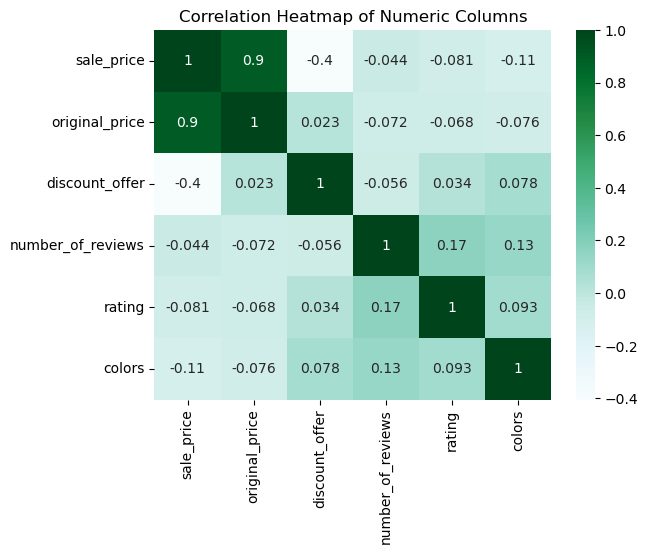

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = products_ns_df[numeric_cols].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='BuGn')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

products_ns_df['sale'] = le.fit_transform(products_ns_df['sale'])

products_ns_df['sale']

/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/1026693357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['sale'] = le.fit_transform(products_ns_df['sale'])


0      0
1      0
2      0
3      0
4      0
      ..
376    1
377    0
378    0
379    0
380    0
Name: sale, Length: 372, dtype: int64

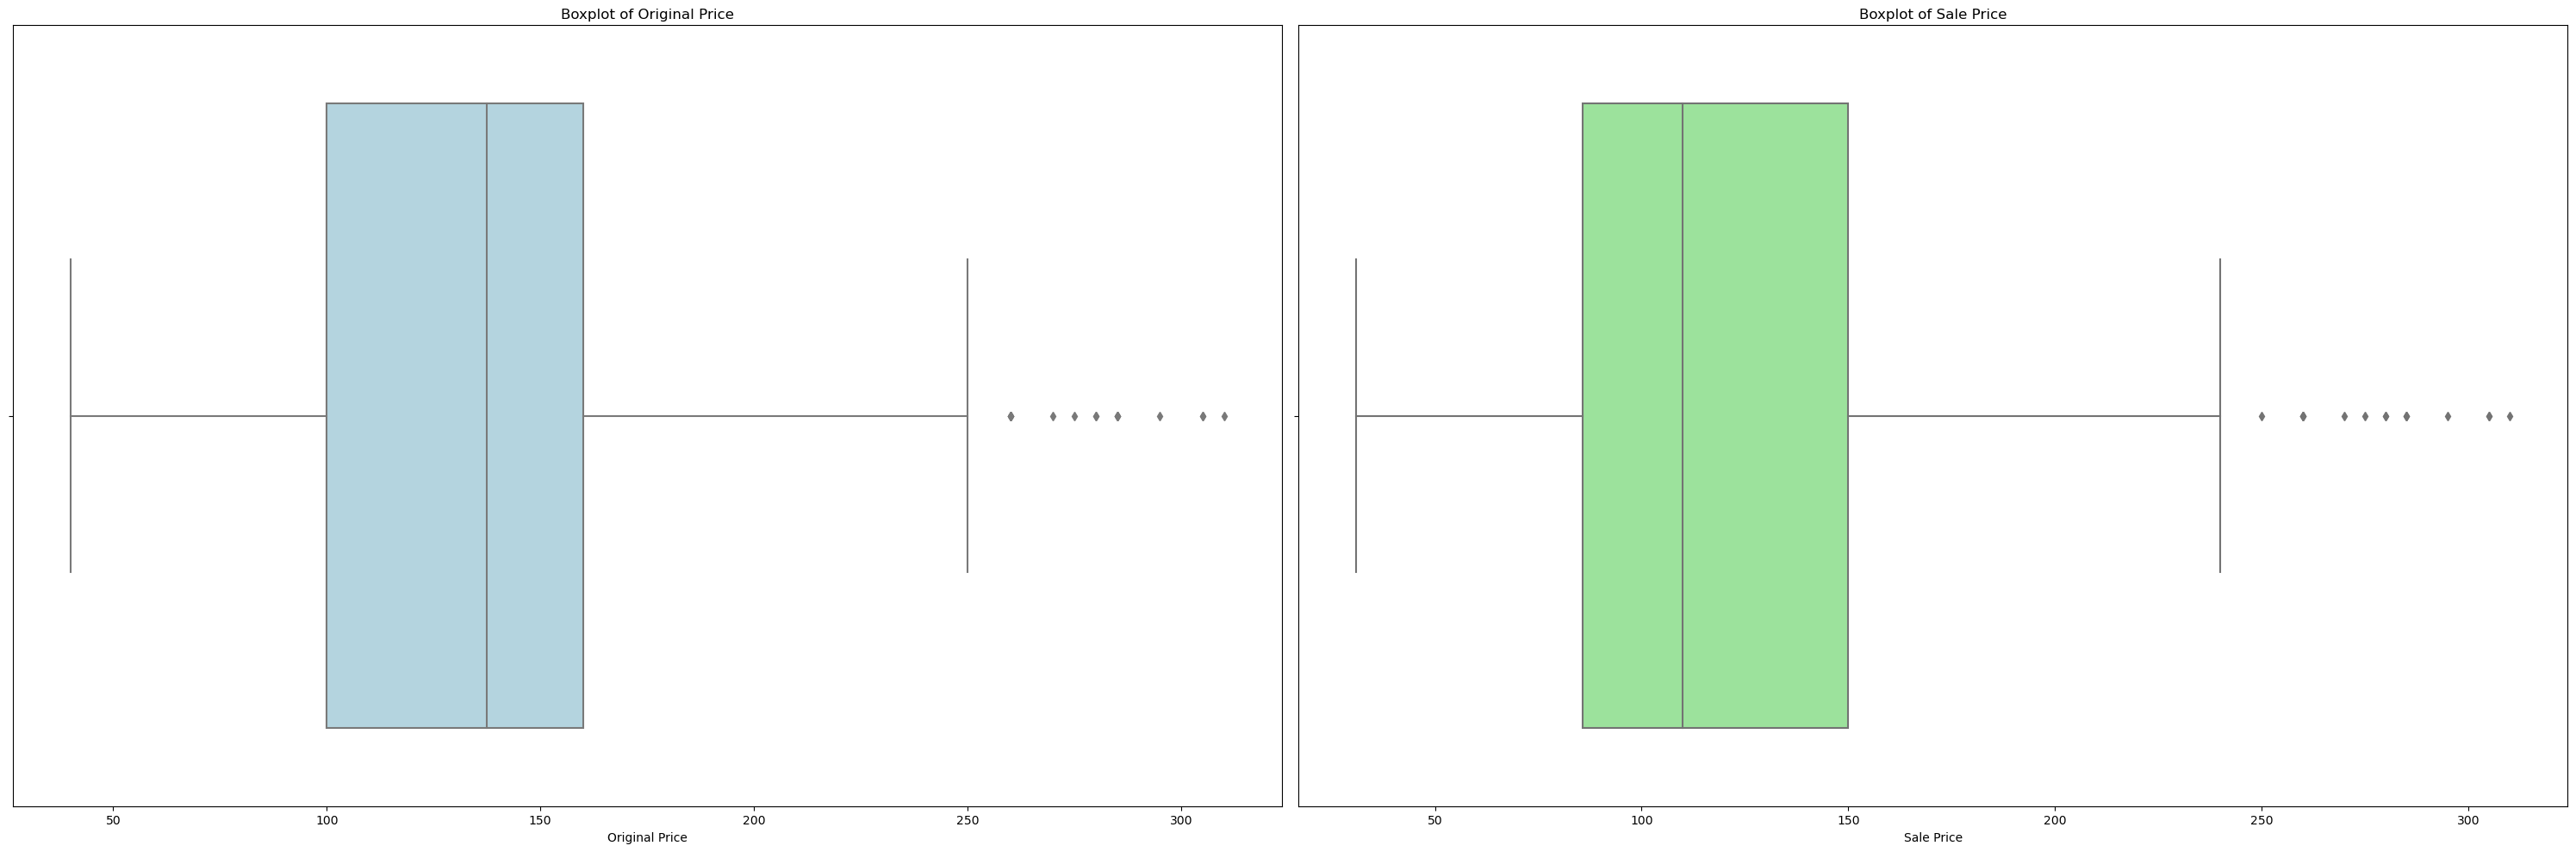

In [41]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

# Boxplot of Original Price
sns.boxplot(ax=axes[0], x=products_ns_df['original_price'], color='lightblue')
axes[0].set_title('Boxplot of Original Price')
axes[0].set_xlabel('Original Price')


# Boxplot of Sale Price
sns.boxplot(ax=axes[1], x=products_ns_df['sale_price'], color='lightgreen')
axes[1].set_title('Boxplot of Sale Price')
axes[1].set_xlabel('Sale Price')


# Display the plot
plt.tight_layout()
plt.show()


/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2629825151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['discount_ratio'] = products_ns_df['discount_offer'] / 100
/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2629825151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['price_change'] = products_ns_df['original_price'] * products_ns_df['discount_ratio']


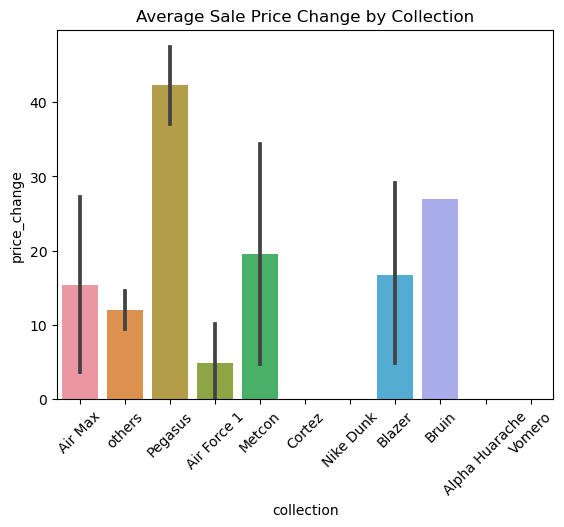

In [42]:
products_ns_df['discount_ratio'] = products_ns_df['discount_offer'] / 100
products_ns_df['price_change'] = products_ns_df['original_price'] * products_ns_df['discount_ratio']

sns.barplot(x='collection', y='price_change', data=products_ns_df)
plt.xticks(rotation=45)
plt.title('Average Sale Price Change by Collection')
plt.show()


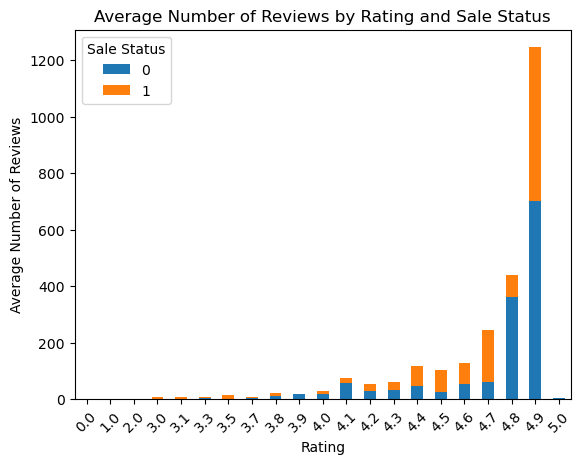

In [43]:
# Group data by 'rating' and 'sale', then calculate the mean number of reviews
grouped_data = products_ns_df.groupby(['rating', 'sale'])['number_of_reviews'].mean().unstack()

# Plot the stacked bar graph
grouped_data.plot(kind='bar', stacked=True)
plt.title('Average Number of Reviews by Rating and Sale Status')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Average Number of Reviews')
plt.legend(title='Sale Status')
plt.show()


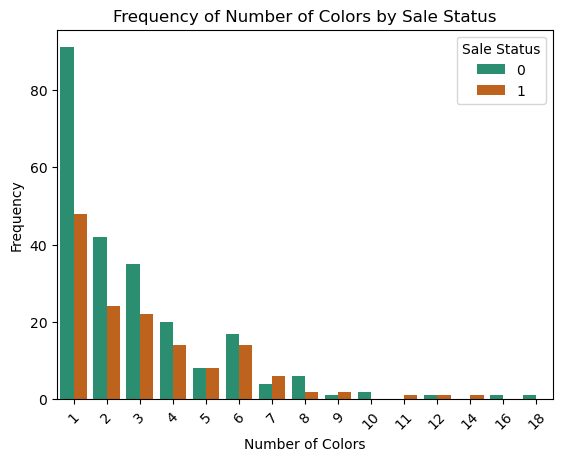

In [44]:
sns.countplot(x='colors', hue='sale', palette= 'Dark2', data=products_ns_df)
plt.title('Frequency of Number of Colors by Sale Status')
plt.xlabel('Number of Colors')
plt.ylabel('Frequency')
plt.legend(title='Sale Status')
plt.xticks(rotation=45)
plt.show()

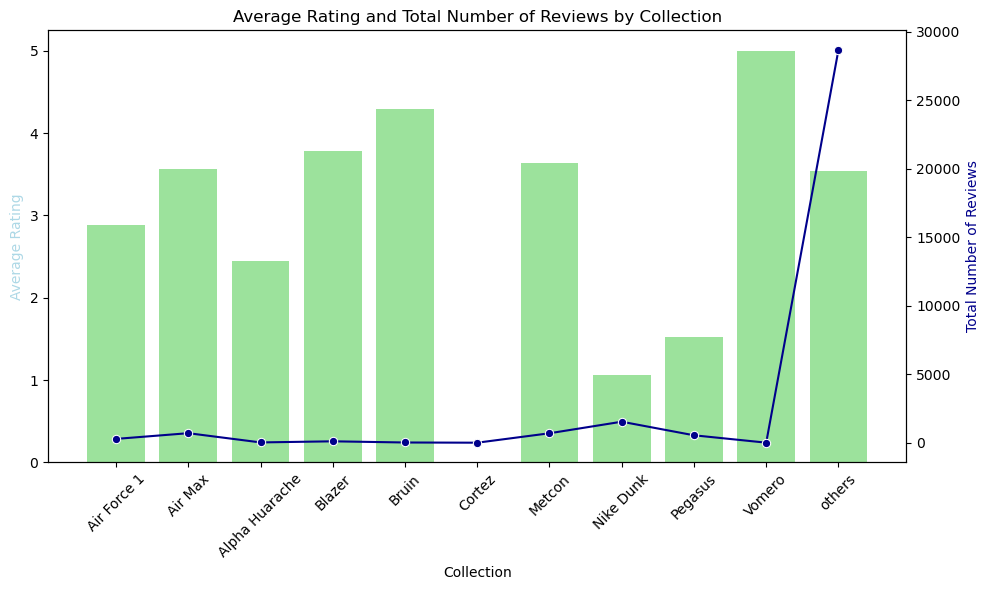

In [45]:
collection_stats = products_ns_df.groupby('collection').agg({'rating': 'mean', 'number_of_reviews': 'sum'}).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='collection', y='rating', data=collection_stats, ax=ax1, color='lightgreen')
ax2 = ax1.twinx()
sns.lineplot(x='collection', y='number_of_reviews', data=collection_stats, ax=ax2, color='darkblue', marker='o')
ax1.set_title('Average Rating and Total Number of Reviews by Collection')
ax1.set_xlabel('Collection')
ax1.set_ylabel('Average Rating', color='lightblue')
ax2.set_ylabel('Total Number of Reviews', color='darkblue')

# Set the x-axis labels to rotate
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to fit
plt.show()

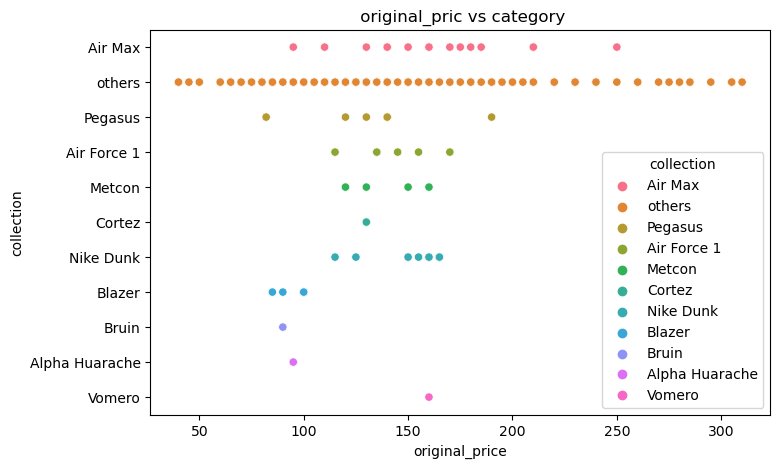

In [46]:
# Age vs. Bank Balance
plt.figure(figsize=(8, 5))

sns.scatterplot(x='original_price', y='collection', hue='collection', data=products_ns_df)
plt.title(' original_pric vs category')
plt.show()


## Model Development

In [47]:
products_ns_df.isnull().sum()

product_id           0
title                0
category             0
sale_price           0
original_price       0
discount_offer       0
description          0
number_of_reviews    0
rating               0
collection           0
colors               0
sale                 0
discount_ratio       0
price_change         0
dtype: int64

In [48]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale,discount_ratio,price_change
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250.00,250.0,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,0,0.00,0.00
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190.00,190.0,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0.0,others,3,0,0.00,0.00
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90.00,90.0,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,0,0.00,0.00
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75.00,75.0,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,0,0.00,0.00
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260.00,260.0,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115.0,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2,1,0.29,33.35
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175.00,175.0,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1,0,0.00,0.00
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125.00,125.0,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1,0,0.00,0.00
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70.00,70.0,0.0,Whether you’re starting out or just playing fo...,1,1.0,others,1,0,0.00,0.00


In [49]:
from sklearn.impute import SimpleImputer



#numerical_features = ['original_price', 'discount_offer', 'number_of_reviews', 'rating', 'sale_price']

#products_ns_df[numerical_features] = numerical_features



## Random Forests

In [50]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale,discount_ratio,price_change
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250.00,250.0,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,0,0.00,0.00
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190.00,190.0,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0.0,others,3,0,0.00,0.00
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90.00,90.0,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,0,0.00,0.00
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75.00,75.0,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,0,0.00,0.00
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260.00,260.0,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115.0,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2,1,0.29,33.35
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175.00,175.0,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1,0,0.00,0.00
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125.00,125.0,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1,0,0.00,0.00
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70.00,70.0,0.0,Whether you’re starting out or just playing fo...,1,1.0,others,1,0,0.00,0.00


In [51]:
## RANDOM FORESTS

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



# Encode '
le = LabelEncoder()
products_ns_df['category_encoded'] = le.fit_transform(products_ns_df['category'])

# Select features and y
X = products_ns_df[['original_price', 'discount_offer', 'number_of_reviews', 'rating', 'colors', 'category_encoded']]
y = products_ns_df['sale_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R-squared (R2 ): {r2_score(y_test, y_pred)}')

Mean Squared Error (MSE): 27.879383422933376
R-squared (R2 ): 0.9902473994786289


/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/3393780916.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['category_encoded'] = le.fit_transform(products_ns_df['category'])


In [52]:
## RANDOM FORESTS

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



# Encode '
le = LabelEncoder()
products_ns_df['category_encoded'] = le.fit_transform(products_ns_df['category'])

# Select features and y
X = products_ns_df[['original_price', 'number_of_reviews', 'rating', 'colors', 'category_encoded']]
y = products_ns_df['sale_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R-squared (R2 ): {r2_score(y_test, y_pred)}')

Mean Squared Error (MSE): 433.53093431294474
R-squared (R2 ): 0.8483447803751307


/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/2495674399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['category_encoded'] = le.fit_transform(products_ns_df['category'])


## Topic Modelling (Text Classification)



 ⁠* Latent Dirichlet Allocation (LDA)
   - *Objective:* Analyze the text in product descriptions to find common themes.
   - *Insights:* Understand common themes in product descriptions, which could be used for marketing and to identify gaps in product features highlighted in descriptions.


It's an unsupervised machine learning model that requires the number of topics as an input and uses the bag-of-words model, which means the order of words is disregarded but their frequency in documents is taken into account.



In [53]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale,discount_ratio,price_change,category_encoded
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250.00,250.0,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,0,0.00,0.00,45
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190.00,190.0,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0.0,others,3,0,0.00,0.00,7
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90.00,90.0,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,0,0.00,0.00,40
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75.00,75.0,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,0,0.00,0.00,48
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260.00,260.0,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,0,0.00,0.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115.0,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2,1,0.29,33.35,45
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175.00,175.0,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1,0,0.00,0.00,5
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125.00,125.0,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1,0,0.00,0.00,45
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70.00,70.0,0.0,Whether you’re starting out or just playing fo...,1,1.0,others,1,0,0.00,0.00,34


In [55]:
!pip install pyLDAvis

import pandas as pd
import numpy as np
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pyLDAvis.gensim_models
import warnings

nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings("ignore", category=DeprecationWarning)



import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')



  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachitaharit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachitaharit/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rachitaharit/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachitaharit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachitaharit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rachitaharit/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

1. Preprocessing:


Tokenization: Split text into individual words or tokens.

Lemmatization: Convert words to their base/ root form. Like "running" to "run".

Stop Word Removal: Removes common words like "the", "is", they don't contribute to the topic


2. Building Dictionary and Corpus:
   
A Dictionary is created mapping each word to a unique id.

A Corpus list of (word_id and word_frequency) pairs. This is a bag-of-words representation.

In [56]:
# Tokenization and lemmatization
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return lemmatized_tokens

# Remove stop words
stop_words = set(stopwords.words('english'))
products_ns_df['processed_description'] = products_ns_df['description'].apply(lambda x: [word for word in preprocess(x) if word not in stop_words])

# Build a Dictionary and Corpus
dictionary = corpora.Dictionary(products_ns_df['processed_description'])
corpus = [dictionary.doc2bow(text) for text in products_ns_df['processed_description']]


/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/1869327040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['processed_description'] = products_ns_df['description'].apply(lambda x: [word for word in preprocess(x) if word not in stop_words])


In [57]:
products_ns_df

,product_id,title,category,sale_price,original_price,discount_offer,description,number_of_reviews,rating,collection,colors,sale,discount_ratio,price_change,category_encoded,processed_description
0,DZ0799-001,Nike Air Max Scorpion Flyknit SE,Men's Shoes,250.00,250.0,0.0,We asked the Nike soothsayer what your future ...,5,4.4,Air Max,6,0,0.00,0.00,45,"[asked, nike, soothsayer, future, hold, answer..."
1,FB2390-900,KD16 By You,Custom Basketball Shoes,190.00,190.0,0.0,Kevin Durant's bag? Bottomless. His range? Lim...,0,0.0,others,3,0,0.00,0.00,7,"[kevin, durant, bag, bottomless, range, limitl..."
2,DV1202-002,Roshe G Next Nature,Men's Golf Shoes,90.00,90.0,0.0,When the sun’s beating down your back and your...,18,4.7,others,3,0,0.00,0.00,40,"[sun, beating, back, drive, landed, bunker, le..."
3,DJ5961-700,Nike Mercurial Superfly 9 Club,Multi-Ground High-Top Soccer Cleats,75.00,75.0,0.0,Instantly tilt the field in the bold design of...,67,4.4,others,3,0,0.00,0.00,48,"[instantly, tilt, field, bold, design, light, ..."
4,FJ2559-100,Nike Phantom GX 2 Elite,FG Low-Top Soccer Cleats,260.00,260.0,0.0,Obsessed with perfecting your craft? We made t...,17,4.6,others,4,0,0.00,0.00,20,"[obsessed, perfecting, craft, made, middle, st..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,553558-072,Air Jordan 1 Low,Men's Shoes,80.97,115.0,29.0,"Inspired by the original that debuted in 1985,...",1742,4.9,others,2,1,0.29,33.35,45,"[inspired, original, debuted, air, jordan, low..."
377,FD2326-100,"Air Jordan XXXVIII Low ""Fresh Start""",Basketball Shoes,175.00,175.0,0.0,"Inspired by the season of rebirth, the Air Jor...",14,4.6,others,1,0,0.00,0.00,5,"[inspired, season, rebirth, air, jordan, xxxvi..."
378,FB8895-601,Nike Dunk Low Retro Premium,Men's Shoes,125.00,125.0,0.0,Created for the hardwood but taken to the stre...,22,4.7,Nike Dunk,1,0,0.00,0.00,45,"[created, hardwood, taken, street, icon, retur..."
379,FJ2558-100,Nike Phantom Luna 2 Club,MG High-Top Soccer Cleats,70.00,70.0,0.0,Whether you’re starting out or just playing fo...,1,1.0,others,1,0,0.00,0.00,34,"[whether, starting, playing, fun, club, shoe, ..."


In [58]:
products_ns_df[['title','collection', 'category', 'description','processed_description']]


,title,collection,category,description,processed_description
0,Nike Air Max Scorpion Flyknit SE,Air Max,Men's Shoes,We asked the Nike soothsayer what your future ...,"[asked, nike, soothsayer, future, hold, answer..."
1,KD16 By You,others,Custom Basketball Shoes,Kevin Durant's bag? Bottomless. His range? Lim...,"[kevin, durant, bag, bottomless, range, limitl..."
2,Roshe G Next Nature,others,Men's Golf Shoes,When the sun’s beating down your back and your...,"[sun, beating, back, drive, landed, bunker, le..."
3,Nike Mercurial Superfly 9 Club,others,Multi-Ground High-Top Soccer Cleats,Instantly tilt the field in the bold design of...,"[instantly, tilt, field, bold, design, light, ..."
4,Nike Phantom GX 2 Elite,others,FG Low-Top Soccer Cleats,Obsessed with perfecting your craft? We made t...,"[obsessed, perfecting, craft, made, middle, st..."
...,...,...,...,...,...
376,Air Jordan 1 Low,others,Men's Shoes,"Inspired by the original that debuted in 1985,...","[inspired, original, debuted, air, jordan, low..."
377,"Air Jordan XXXVIII Low ""Fresh Start""",others,Basketball Shoes,"Inspired by the season of rebirth, the Air Jor...","[inspired, season, rebirth, air, jordan, xxxvi..."
378,Nike Dunk Low Retro Premium,Nike Dunk,Men's Shoes,Created for the hardwood but taken to the stre...,"[created, hardwood, taken, street, icon, retur..."
379,Nike Phantom Luna 2 Club,others,MG High-Top Soccer Cleats,Whether you’re starting out or just playing fo...,"[whether, starting, playing, fun, club, shoe, ..."


3. Creating LDA Model:
The LdaModel takes the corpus and dictionary to train the model.

The num_topics parameter is the number of topics we want the model to identify.

Passes is controlling how many times the model passes over the entire corpus. More passes can lead to a better model but also it will take more time to train.

In [59]:
# Set training parameters.
num_topics = 5  # we can adjust this
passes = 10  # we can set to higher numbers if the model needs more training

# Create an LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

# View topics in LDA model
for i, topic in lda_model.print_topics(-1):
    print(f'Topic {i}: Words: {topic}')


Topic 0: Words: 0.014*"nike" + 0.013*"game" + 0.011*"design" + 0.011*"air" + 0.010*"help" + 0.008*"leather" + 0.007*"give" + 0.007*"shoe" + 0.006*"original" + 0.006*"feel"
Topic 1: Words: 0.019*"help" + 0.014*"game" + 0.013*"air" + 0.012*"take" + 0.010*"field" + 0.009*"touch" + 0.009*"cleat" + 0.008*"zoom" + 0.008*"next" + 0.007*"level"
Topic 2: Words: 0.012*"nike" + 0.011*"help" + 0.011*"air" + 0.010*"zoom" + 0.010*"take" + 0.009*"shoe" + 0.008*"design" + 0.007*"game" + 0.007*"upper" + 0.007*"comfort"
Topic 3: Words: 0.049*"run" + 0.025*"day" + 0.024*"peg" + 0.014*"like" + 0.014*"go" + 0.014*"support" + 0.014*"comfort" + 0.014*"improved" + 0.013*"foot" + 0.013*"help"
Topic 4: Words: 0.016*"nike" + 0.015*"air" + 0.012*"shoe" + 0.012*"help" + 0.010*"design" + 0.008*"like" + 0.007*"traction" + 0.007*"max" + 0.007*"color" + 0.007*"game"


Topic 0 is about performance and traction, related to sports shoes. Words like "air," "nike," "game," "zoom," "cleat," and "traction" suggest athletic footwear, like soccer cleats or other field sports shoes that require good traction.


Topic 1 focus on aesthetics and material, words like "leather," "shoe," "design," "look," "color," and "made." This might refer to the style and construction of the shoe, focusing on design elements and material choices.


Topic 2 seems to mix performance with design aspects. Words like "air," "designed," "precision," "touch," and "zoom" imply shoes designed for specific athletic activities that require precision, such as basketball or running shoes.


Topic 3 revolves around comfort and durability with "nike," "air," "comfort," "rubber," "design," and "upper" suggesting a focus on shoes that offer comfortable wear and are designed with durable materials.


Topic 4 highlights comfort and support for running indicated by words such as "run," "day," "peg", "support," "speed," "comfort," and "feel." This topic seems to be about the overall experience of using Nike running shoes, emphasizing their comfort and support for daily running and speed work.

The results show that the LDA model has managed to extract relevant topics from the product descriptions that can be tied back to the types of products and their features. This kind of analysis can be valuable for understanding what features are most talked about and how different product lines or models are positioned in terms of their marketing and design focus.

In [60]:
# Visualize the topics for interpretability
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


Intertopic Distance Map (left side):

The distance between any two bubbles shows how different or similar they are; the further apart, the less they have in common.
The size of a bubble represents the prevalence of the topic in the corpus. Larger bubbles indicate topics that occur more frequently in the documents.
The plot is based on multidimensional scaling (MDS), which helps to visualize the similarity/dissimilarity (distance) between topics.
The axes (PC1 and PC2) are principal components that represent the topics' underlying patterns in the data that explain the most variance 

Top-30 Most Relevant Terms for Topic 4 (right side):

The bar chart lists the terms that are most relevant to the selected topic. The length of the bar represents the term's frequency within the topic.
The red bars represent the estimated term frequency within the selected topic, and the blue bars represent the term's overall frequency in the corpus.


## LSTM

In [61]:
import pandas as pd


pd.set_option('display.max_colwidth', None)
display(products_ns_df[['collection', 'processed_description']])


,collection,processed_description
0,Air Max,"[asked, nike, soothsayer, future, hold, answer, whole, lotta, comfort, built, around, concept, point, loading, translation, great, responsiveness, better, sensation, improved, cushioning, air, max, scorpion, open, new, chapter, book, footwear, magic, consult, crystal, ball, see, disruptive, design, pair, fabric, lightweight, flyknit, recycled, entire, design, made, least, recycled, content, weight, step, outside, let, sun, magic, take, activating, nike, air, unit, true, perfect, finish, spellbinding, look]"
1,others,"[kevin, durant, bag, bottomless, range, limitless, customization, choice, take, guess, fresh, color, palette, enough, design, option, satisfy, even, avid, artist, highlight, shoe, bent, giving, breathing, room, cook, top, several, different, tongue, collar, choice, help, game, beam, nike, air, zoom, air, work, together, provide, speed, stability, quarter, upper, lower, overall, load, lighter, compared, ideal, hoopaholic, say, one, game]"
2,others,"[sun, beating, back, drive, landed, bunker, lean, roshe, design, help, find, peace, round, going, way, inherently, simple, stylish, breathable, comfortable, perfect, playing, month, full, mesh, upper, soft, lightweight, foam, midsole, form, cushioned, combination, help, maintain, internal, calm, even, game, go, gutter]"
3,others,"[instantly, tilt, field, bold, design, light, superfly, club, fast, air]"
4,others,"[obsessed, perfecting, craft, made, middle, storm, chaos, swirling, around, calmly, found, final, third, field, thanks, uncanny, mix, guile, grace, go, finish, job, phantom, gx, elite, design, elite, cleat, world, biggest, star, give, quality, demand, greatness, footwear]"
...,...,...
376,others,"[inspired, original, debuted, air, jordan, low, offer, clean, classic, look, familiar, yet, always, fresh, iconic, design, pair, perfectly, kick, ensure, always, point]"
377,others,"[inspired, season, rebirth, air, jordan, xxxviii, low, fresh, start, feature, pastel, neutral, upper, outsole, new, forefoot, tooling, get, even, closer, tech, like, stabilizing, zoom, strobel, peak, performance, shoe, built, speed, shiftiness, modern, game]"
378,Nike Dunk,"[created, hardwood, taken, street, icon, return, classic, detail, throwback, hoop, flair, channeling, vintage, style, back, onto, street, padded, collar, let, take, game, comfort]"
379,others,"[whether, starting, playing, fun, club, shoe, get, field, without, compromising, quality, created, goal, mind, phantom, luna, club, ha, grippy, texture, covering, striking, area, shoe, reliable, traction, help, guide, unscripted, agility]"


In [63]:
!pip install tensorflow
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode the collection labels
label_encoder = LabelEncoder()
products_ns_df['collection_encoded'] = label_encoder.fit_transform(products_ns_df['collection'])

# Prepare the tokenizer on the processed descriptions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(products_ns_df['processed_description'])
vocab_size = len(tokenizer.word_index) + 1

# Converting descriptions to sequences
sequences = tokenizer.texts_to_sequences(products_ns_df['processed_description'])

# Pad the sequences
max_sequence_len = max([len(x) for x in sequences])

X = pad_sequences(sequences, maxlen=max_sequence_len)
y = products_ns_df['collection_encoded']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential()
model.add(Input(shape=(max_sequence_len,)))  
model.add(Embedding(vocab_size, 100))  
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Predicting the collection for new descriptions
def predict_collection(processed_description):
    # Convert text to padded sequence
    sequence = tokenizer.texts_to_sequences([processed_description])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_len)
    
    # Perform the prediction
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction, axis=-1)
    
    # Translate numerical prediction back into collection name
    collection_name = label_encoder.inverse_transform(predicted_class)
    return collection_name[0]


example_description = 'created, hardwood, taken, street, icon, return, classic, detail, throwback, hoop, flair, channeling, vintage, style, back, onto, street, padded, collar, let, take, game, comfort'
print(predict_collection(example_description))


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e

/var/folders/km/q91kkggx4_zbyz682jjb8w_c0000gn/T/ipykernel_44233/438283863.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_ns_df['collection_encoded'] = label_encoder.fit_transform(products_ns_df['collection'])


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5716 - loss: 2.1552 - val_accuracy: 0.7333 - val_loss: 1.2074
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7618 - loss: 1.1020 - val_accuracy: 0.7333 - val_loss: 0.8951
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7690 - loss: 0.9373 - val_accuracy: 0.8800 - val_loss: 0.6242
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8499 - loss: 0.7539 - val_accuracy: 0.8800 - val_loss: 0.5809
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8325 - loss: 0.7820 - val_accuracy: 0.8800 - val_loss: 0.5675
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8274 - loss: 0.7350 - val_accuracy: 0.8800 - val_loss: 0.5330
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8565 - loss: 0.5738 - val_accuracy: 0.8800 - val_loss: 0.4710
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8578 - loss: 0.4341 - val_accuracy: 0.8933 - val_loss: 0

Accuracy - by the 10th epoch, the training accuracy is about 90.55%, and the validation accuracy is 84.21%.

Loss - the model has a training loss of 0.3003 and a validation loss of 0.7443.


Incorrectly predicts "Air Max" instead of "Nike Dunk".

This could be due to several reasons:

The model may be overfitting to the training data and not generalizing well to unseen descriptions.
The amount of training data may not be sufficient as we have only 300 records for training and they are not varied enough to capture the nuances across different collections.

The keywords provided in the example may not be distinctive enough for the model to make an accurate prediction

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 69, 100)        │       218,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 69, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 69, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,407,155 (5.37 MB)

 Trainable params: 469,051 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 938,104 (3.58 MB)

In [65]:
# 383	Pegasus	[springy, ride, run, peg, familiar, feel, return, help, accomplish, goal, version, ha, responsiveness, neutral, support, love, improved, comfort, sensitive, area, foot, like, arch, toe, whether, logging, long, marathon, mile, squeezing, speed, session, sun, go, hopping, spontaneous, group, jaunt, still, established, road, runner, put, faith, day, day, run, run, special, tuskegee, peg, let, run, rep, favorite, school, time]


example_description = 'springy, ride, run, peg, familiar, feel, return, help, accomplish, goal, version, ha, responsiveness, neutral, support, love, improved, comfort, sensitive, area, foot, like, arch, toe, whether, logging, long, marathon, mile, squeezing, speed, session, sun, go, hopping, spontaneous, group, jaunt, still, established, road, runner, put, faith, day, day, run, run, special, tuskegee, peg, let, run, rep, favorite, school, time'
print(predict_collection(example_description))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Pegasus


In [66]:
# 380	Alpha Huarache	[let, baseball, world, know, kind, beast, ride, plushy, smooth, expense, looking, tame, break, home, run, trot, around, bag, purplish, orange, hue, spread, throughout, version, ha, hint, grand, canyon, state, glowing, spring, sky]

example_description = 'let, baseball, world, know, kind, beast, ride, plushy, smooth, expense, looking, tame, break, home, run, trot, around, bag, purplish, orange, hue, spread, throughout, version, ha, hint, grand, canyon, state, glowing, spring, sky'
print(predict_collection(example_description))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Bruin


In [67]:
# Group by 'collection' and  'processed_description' 
unique_collections_descriptions = products_ns_df.groupby('collection')['processed_description'].first().reset_index()

display(unique_collections_descriptions)


,collection,processed_description
0,Air Force 1,"[shine, satin, stay, classic, canvas, get, luxe, leather, matter, choose, color, choice, additional, gum, rubber, option, sole, mean, design, destined, one, like]"
1,Air Max,"[asked, nike, soothsayer, future, hold, answer, whole, lotta, comfort, built, around, concept, point, loading, translation, great, responsiveness, better, sensation, improved, cushioning, air, max, scorpion, open, new, chapter, book, footwear, magic, consult, crystal, ball, see, disruptive, design, pair, fabric, lightweight, flyknit, recycled, entire, design, made, least, recycled, content, weight, step, outside, let, sun, magic, take, activating, nike, air, unit, true, perfect, finish, spellbinding, look]"
2,Alpha Huarache,"[let, baseball, world, know, kind, beast, midsole, ha, react, foam, cushioning, perfect, sprinting, around, bag, robbing, opponent, extra, base, plush, breathable, upper, sport, strap, help, keep, contained, without, adding, unnecessary, weight, plus, grippy, rubber, traction, effort, play]"
3,Blazer,"[rebuilt, using, insight, grant, taylor, nike, sb, zoom, blazer, low, pro, gt, fresh, take, favorite, skate, shoe, updated, design, ha, higher, taping, give, durability]"
4,Bruin,[]
5,Cortez,"[time, level, style, cortez, faint, heart, think, need, cheat, code, ace, platform, level, decide, high, want, go, whether, want, traditional, look, really, feel, like, stepping, outsole, complete, custom, color, blocking, level, customize, upper, vintage, premium, somewhere, kind, material, color, level, collect, jewel, go, either, jeweled, classic, swoosh, logo, tumbled, leather, suede, switch, side, shoe, level, easter, egg, option, ribbon, lacing, dubrae, shoelery, finish, look]"
6,Metcon,"[workout, wade, nitty, gritty, nike, free, metcon, meet, depth, help, dig, deep, find, final, ounce, force, come, side, high, match, style, substance, forefoot, flexibility, backend, stability, perfect, flying, cardio, day, enhancing, agility, revamped, upper, offer, easier, entry, collar, made, ankle]"
7,Nike Dunk,"[cheetah, tiger, time, design, dunk, dream, left, right, shoe, customized, independently, excluding, character, personalization, let, imagination, go, wild, velvet, cheetah, tiger, print, color, palette, mix, textural, croc, suede, ultimate, maximalist, look, forget, shoelery, finishing, touch]"
8,Pegasus,"[springy, ride, run, peg, familiar, feel, return, help, accomplish, goal, version, ha, responsiveness, neutral, support, love, improved, comfort, sensitive, area, foot, like, arch, toe, whether, logging, long, marathon, mile, squeezing, speed, session, sun, go, hopping, spontaneous, group, jaunt, still, established, road, runner, put, faith, day, day, run, run, special, clemson, peg, let, run, rep, favorite, school, time]"
9,Vomero,"[carve, new, lane, zoom, vomero, complexity, depth, easy, styling, richly, layered, design, includes, textile, leather, plastic, accent, come, together, make, one, coolest, sneaker, season]"


In [68]:

example_description = 'shine, satin, stay, classic, canvas, get, luxe, leather, matter, choose, color, choice, additional, gum, rubber, option, sole, mean, design, destined, one, like'
print(predict_collection(example_description))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Bruin


In [69]:

for index, row in products_ns_df.iterrows():
    original_collection = row['collection']
    description = row['processed_description']
    predicted_collection = predict_collection(description)  
    print(f"For index: {index}, Original Collection: {original_collection} - Predicted Collection: {predicted_collection}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
For index: 0, Original Collection: Air Max - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
For index: 1, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
For index: 2, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
For index: 3, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
For index: 4, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
For index: 5, Original Collection: Pegasus - Predicted Collection: Pegasus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
For index: 6, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
For index: 7, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
For index: 8, Original Collection: others - Predicted Collection: other

In [70]:
correct_predictions = 0
total_predictions = len(products_ns_df)


for index, row in products_ns_df.iterrows():
    original_collection = row['collection']
    description = ' '.join(row['processed_description']) 
    predicted_collection = predict_collection(description)  
    
    # To Check if the prediction is correct
    if original_collection == predicted_collection:
        correct_predictions += 1
    
    print(f"For index: {index}, Original Collection: {original_collection} - Predicted Collection: {predicted_collection}")

# Calculate accuracy rate
accuracy_rate = correct_predictions / total_predictions
print(f"Accuracy rate: {accuracy_rate:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
For index: 0, Original Collection: Air Max - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
For index: 1, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
For index: 2, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
For index: 3, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
For index: 4, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
For index: 5, Original Collection: Pegasus - Predicted Collection: Pegasus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
For index: 6, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
For index: 7, Original Collection: others - Predicted Collection: others
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
For index: 8, Original Collection: others - Predicted Collection: other

BUSIINESS QUESTIONS

LDA revealed product descriptions from the Nike website, it revealed patterns, trends, and structures within the data that might not be immediately obvious. 

1. What are the main topics or themes across Nike's product range?
To help understand the variety or focus in Nike's product line, identifying whether certain themes (like performance, sustainability, or lifestyle) are more prevalent.

2. How do product descriptions vary across different categories of products?
Compared topics to understand the marketing emphasis and product features that are highlighted in each category.

3. Which topics are most associated with premium products?
To understand the differentiation strategy for premium versus standard products using of product features, benefits and technologies.